In [46]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import warnings
warnings.filterwarnings(action='ignore')

In [47]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [48]:
!tree -dL 2 data/aclImdb

매개 변수가 너무 많습니다 - 2


In [49]:
from sklearn.datasets import load_files

reviews_train = load_files("C:\/Users/iws1/Text/aclImdb/train/")
# 텍스트와 레이블을 포함하고 있는 Bunch 오브젝트를 반환합니다.
text_train, y_train = reviews_train.data, reviews_train.target
print("text_train의 타입:", type(text_train))
print("text_train의 길이:", len(text_train))
print("text_train[6]:\n", text_train[6])

text_train의 타입: <class 'list'>
text_train의 길이: 25000
text_train[6]:
 b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [50]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [51]:
print("클래스별 샘플 수 (훈련 데이터):", np.bincount(y_train))

클래스별 샘플 수 (훈련 데이터): [12500 12500]


In [52]:
reviews_test = load_files("C:\/Users/iws1/Text/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("테스트 데이터의 문서 수:", len(text_test))
print("클래스별 샘플 수 (테스트 데이터):", np.bincount(y_test))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

테스트 데이터의 문서 수: 25000
클래스별 샘플 수 (테스트 데이터): [12500 12500]


In [53]:
bards_words = ["The fool doth think he is wise,", "but the wise man knows himself to be a fool"]

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [55]:
print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:\n", vect.vocabulary_)

어휘 사전의 크기: 13
어휘 사전의 내용:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [56]:
bag_of_words = vect.transform(bards_words)
print("BOW:", repr(bag_of_words))

BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [57]:
print("BOW의 밀집 표현:\n", bag_of_words.toarray())

BOW의 밀집 표현:
 [[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [58]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n", repr(X_train))

X_train:
 <25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [59]:
feature_names = vect.get_feature_names()
print("특성 개수:", len(feature_names))
print("처음 20개 특성:\n", feature_names[:20])
print("20010에서 20030까지 특성:\n", feature_names[20010:20030])
print("매 2000번째 특성:\n", feature_names[::2000])

특성 개수: 74849
처음 20개 특성:
 ['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
20010에서 20030까지 특성:
 ['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
매 2000번째 특성:
 ['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5)
print("교차 검증 평균 점수: {:.2f}".format(np.mean(scores)))

교차 검증 평균 점수: 0.88


In [61]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수:", grid.best_params_)

최상의 교차 검증 점수: 0.89
최적의 매개변수: {'C': 0.1}


In [62]:
X_test = vect.transform(text_test)
print("테스트 점수: {:.2f}".format(grid.score(X_test, y_test)))

테스트 점수: 0.88


In [63]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("min_df로 제한한 X_train:", repr(X_train))

min_df로 제한한 X_train: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [64]:
feature_names = vect.get_feature_names()

print("처음 50개 특성:\n", feature_names[:50])
print("20,010부터 20,030까지 특성:\n", feature_names[20010:20030])
print("매 700번째 특성:\n", feature_names[::700])

처음 50개 특성:
 ['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
20,010부터 20,030까지 특성:
 ['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
매 700번째 특성:
 ['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciation', 'recipient',

In [65]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최적의 교차 검증 점수: {:.2f}".format(grid.best_score_))

최적의 교차 검증 점수: 0.89


In [66]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("불용어 개수:", len(ENGLISH_STOP_WORDS))
print("매 10번째 불용어:\n", list(ENGLISH_STOP_WORDS)[::10])

불용어 개수: 318
매 10번째 불용어:
 ['detail', 'move', 'wherein', 'other', 'your', 'something', 'otherwise', 'keep', 'mostly', 'became', 'down', 'fifteen', 'ourselves', 'with', 'bill', 'nevertheless', 'above', 'three', 'name', 'de', 'have', 'wherever', 'every', 'third', 'nine', 'beforehand', 'top', 'anywhere', 'we', 'some', 'where', 'had']


In [67]:
# stop_words="english"라고 지정하면 내장된 불용어를 사용합니다.
# 내장된 불용어에 추가할 수도 있고 자신만의 목록을 사용할 수도 있습니다.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("불용어가 제거된 X_train:\n", repr(X_train))

불용어가 제거된 X_train:
 <25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [68]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))

최상의 교차 검증 점수: 0.88


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상이 교차 검증 점수: {:.2f}".format(grid.best_score_))

최상이 교차 검증 점수: 0.89


In [70]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# 훈련 데이터셋을 변환합니다.
X_train = vectorizer.transform(text_train)
# 특성별로 가장 큰 값을 찾습니다.
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# 특성 이름을 구합니다.
feature_names = np.array(vectorizer.get_feature_names())

print("가장 낮은 tfidf를 가진 특성:\n", feature_names[sorted_by_tfidf[:20]])
print("가장 높은 tfidf를 가진 특성:\n", feature_names[sorted_by_tfidf[-20:]])

가장 낮은 tfidf를 가진 특성:
 ['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
가장 높은 tfidf를 가진 특성:
 ['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [71]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("가장 낮은 idf를 가진 특성:\n", feature_names[sorted_by_idf[:100]])

가장 낮은 idf를 가진 특성:
 ['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


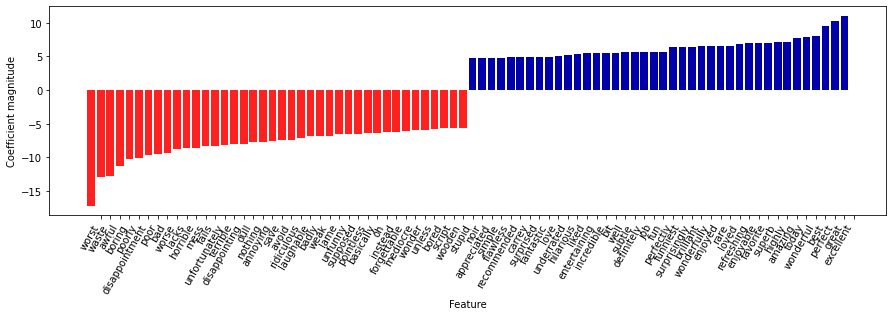

In [72]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_[0],
                                    feature_names, n_top_features=40)

In [73]:
print("bards_words:\n", bards_words)

bards_words:
 ['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [74]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:\n", cv.get_feature_names())

어휘 사전 크기: 13
어휘 사전:
 ['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [75]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:\n", cv.get_feature_names())

어휘 사전 크기: 14
어휘 사전:
 ['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [76]:
print("변환된 데이터 (밀집 배열):\n", cv.transform(bards_words).toarray())

변환된 데이터 (밀집 배열):
 [[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [77]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:\n", cv.get_feature_names())

어휘 사전 크기: 39
어휘 사전:
 ['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [78]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
# 매개변수 조합이 많고 트라이그램이 포함되어 있기 때문에
# 그리드 서치 실행에 시간이 오래 걸립니다.
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
             'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))
print("최적의 매개변수:\n", grid.best_params_)

최상의 교차 검증 점수: 0.91
최적의 매개변수:
 {'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


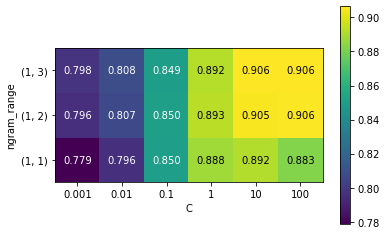

In [79]:
# 그리드 서치에서 테스트 점수를 추출합니다.
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# 히트맵을 그립니다.
heatmap = mglearn.tools.heatmap(scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
                               xticklabels=param_grid['logisticregression__C'],
                                 yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

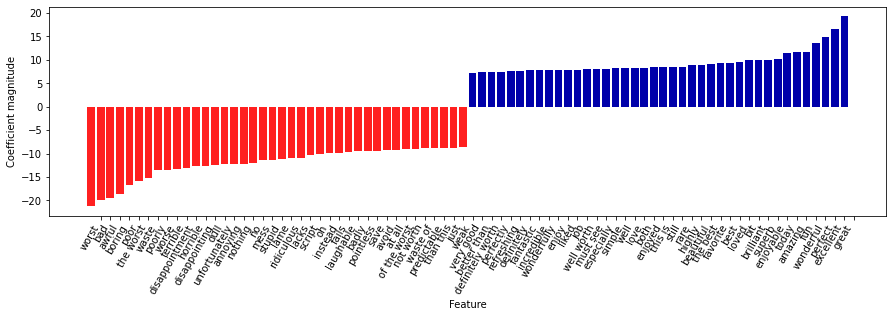

In [80]:
# 특성 이름과 계수를 추출합니다.
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef[0], feature_names, n_top_features=40)

In [81]:
# 트라이그램 특성을 찾습니다.
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# 트라이그램 특성만 그래프로 나타냅니다.
# mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=40)

In [82]:
import spacy
print("spacy 버전", spacy.__version__)
import nltk
print("nltk 버전", nltk.__version__)

spacy 버전 3.0.6
nltk 버전 3.5


In [83]:
# spacy의 영어 모델을 로드합니다.
en_nlp = spacy.load('en_core_web_sm')
# nltk의 PorterStemmer 객체를 만듭니다.
stemmer = nltk.stem.PorterStemmer()

# spacy의 표제어 추출과 nltk의 어간 추출을 비교하는 함수입니다.
def compare_normalization(doc):
    # spacy로 문서를 토큰화합니다.
    doc_spacy = en_nlp(doc)
    # spacy로 찾은 표제어를 출력합니다.
    print("표제어:")
    print([token.lemma_ for token in doc_spacy])
    # PorterStemmer로 찾은 토큰을 출력합니다.
    print("어간:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [84]:
compare_normalization(u"Our meeting today was worse than yesterday, " "I'm scared of meeting the clients tomorrow." )

표제어:
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', 'I', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
어간:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [85]:
# 요구사항: spacy에서 표제어 추출 기능과 CountVectorzier의 토큰 분할기를 사용합니다.

# spacy의 언어 모델을 로드합니다.
en_nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# spacy 문서 처리 파이프라인을 사용해 자작 토큰 분할기를 만듭니다.
# (우리만의 토큰 분할기를 사용합니다.)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

# 자작 토큰 분할기를 사용해 CountVectorizer 객체를 만듭니다.
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

In [86]:
# 표제어 추출이 가능한 CountVectorizer 객체로 text_train을 변환합니다.
X_train_lemma = lemma_vect.fit_transform(text_train)
print("X_train_lemma.shape:", X_train_lemma.shape)

#비교를 위해 표준 CountVectorizer를 사용합니다.
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train.shape", X_train.shape)

X_train_lemma.shape: (25000, 21837)
X_train.shape (25000, 27271)


In [87]:
# 훈련 세트의 1%만 사용해서 그리드 서치를 만듭니다.
from sklearn.model_selection import StratifiedShuffleSplit

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99, train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=cv)

# 기본 CountVectorizer로 그리드 서치를 수행합니다.
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수" "(기본 CountVectorizer): {:.3f}".format(grid.best_score_))

# 표제어를 사용해서 그리드 서치를 수행합니다.
grid.fit(X_train_lemma, y_train)
print("최상의 교차 검증 점수 " "(표제어): {:.3f}".format(grid.best_score_))

최상의 교차 검증 점수(기본 CountVectorizer): 0.719
최상의 교차 검증 점수 (표제어): 0.716


In [88]:
df_train = pd.read_csv('C:\/Users/iws1/Text/nsmc-master/ratings_train.txt', delimiter='\t', keep_default_na=False)
df_train.head(n=3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [89]:
X_train, y_train = df_train['document'].values, df_train['label'].values

In [90]:
df_test = pd.read_csv('C:\/Users/iws1/Text/nsmc-master/ratings_test.txt', delimiter='\t', keep_default_na=False)
text_test = df_test['document'].values
y_test = df_test['label'].values

In [91]:
len(text_train), np.bincount(y_train)

(25000, array([75173, 74827], dtype=int64))

In [92]:
len(text_test), np.bincount(y_test)

(50000, array([24827, 25173], dtype=int64))

In [93]:
from konlpy.tag import Okt
okt_tag = Okt

In [94]:
def okt_tokenizer(text):
    return okt_tag.morphs(text)

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

okt_param_grid = {'tfidfvectorizer__min_df': [3, 5, 7],
                 'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
                 'logisticregression__C': [0.1, 1, 10]}
okt_pipe = make_pipeline(TfidfVectorizer(tokenizer=okt_tokenizer), LogisticRegression(solver='liblinear'))
okt_grid = GridSearchCV(okt_pipe, okt_param_grid, cv=3)

# 그리드 서치를 수행합니다.
okt_grid.fit(text_train[0:1000], y_train[0:1000])
print("최상의 교차 검증 점수: {:.3f}".format(okt_grid.best_score_))
print("최적의 교차 검증 매개변수: ", format(okt_grid.best_params_))

TypeError: morphs() missing 1 required positional argument: 'phrase'

In [97]:
X_test_okt = okt_grid.best_estimator_.named_steps["tfidfvectorizer"].transform(text_test)

score = okt_grid.best_estimator_.named_steps["logisticregression"].score(X_test_okt, y_test)
print("테스트 세트 점수: {:.3f}".format(score))

NotFittedError: Vocabulary not fitted or provided

In [98]:
from konlpy.tag import Mecab
mecab = Mecab()
def mecab_tokenizer(text):
    return mecab.morphs(text)

Exception: Install MeCab in order to use it: http://konlpy.org/en/latest/install/

In [ ]:
mecab_param_grid = {'tfidfvectorizer__min_df': [3, 5, 7],
                 'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
                 'logisticregression__C': [0.1, 1, 10, 100]}
mecab_pipe = make_pipeline(TfidfVectorizer(tokenizer=mecab_tokenizer), LogisticRegression(solver='liblinear'))
mecab_grid = GridSearchCV(mecab_pipe, mecab_param_grid, cv=3)

# 그리드 서치를 수행합니다.
mecab_grid.fit(text_train, y_train)
print("최상의 크로스 밸리데이션 점수: {:.3f}".format(mecab_grid.best_score_))
print("최적의 크로스 밸리데이션 파라미터: ", mecab_grid.best_params_)

In [ ]:
X_test_mecab = mecab_grid.best_estimator_.named_steps["tfidfvectorizer"].transform(text_test)
score = mecab_grid.best_estimator_.named_steps["logisticregression"].score(X_test_mecab, y_test)
print("테스트 세트 점수: {:.3f}".format(score))

In [100]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [101]:
from sklearn.decomposition import LatentDiricheltAllocation
lda = LatentDirichletAllocation(n_samples=10, learning_method="batch", max_iter=25, random_state=0)
# 모델 생성과 변환을 한 번에 합니다.
# 변환 시간이 좀 걸리므로 시간을 절약하기 위해 동시에 처리합니다.
document_topics = lda.fit_transform(X)

ImportError: cannot import name 'LatentDiricheltAllocation' from 'sklearn.decomposition' (C:\Users\iws1\anaconda3\lib\site-packages\sklearn\decomposition\__init__.py)

In [ ]:
print("lda.components_.shape:", lda.components_.shape)

In [ ]:
# 토픽마다(components_의 행) 특서을 오름차순으로 정렬합니다.
# 내림차순이 되도록 [:. ::-1] 사용해 행의 정렬을 반대로 바꿉니다.
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# CountVectorizer객체에서 특성 이름을 구합니다.
feature_names = np.array(vect.get_feature_names())

In [ ]:
# 10개의 토픽을 출력합니다.
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

In [ ]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch", max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [ ]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])

In [ ]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.pirnt_topics(topics=topics, feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=20)

In [ ]:
# 음악적인 토픽 45를 가중치로 정렬합니다.
music = np.argsort(document_topics100[:, 45])[::-1]
# 이 토픽이 가장 비중이 큰 문서 다섯개를 출력합니다.
for i in music[:10]:
    # 첫 두 문장을 출력합니다.
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

NameError: name 'sorting' is not defined

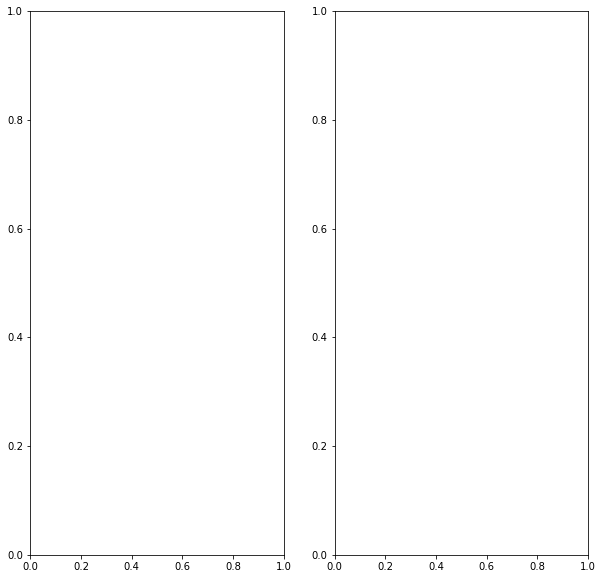

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2}".format(i) + " ".join(words) for i, words in enumerate(feature_names[sorting[:, :2]])]
# 열이 두 개인 막대 그래프
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arnage(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

In [102]:
from sklearn.base import BaseEstimator, TransformerMixin

class MyTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, first_parameter=1, second_parameter=2):
        # __init__ 메소드에 필요한 모든 매개변수를 나열합니다.
        self.first_parameter = 1
        self.second_parameter = 2
        
    def fit(self, X, y=None):
        # fit 메소드는 X와 y 매개변수만을 갖습니다.
        # 비지도 학습 모델이더라도 y 매개변수를 받도록 해야 합니다!
        
        # 모델 학습 시작
        print("모델 학습을 시작합니다")
        # 객체 자신인 self를 반환합니다.
        return self
    
    def transform(self, X):
        # transform 메서드는 X 매개변수만을 받습니다.
        
        # X를 변환합니다.
        X_transformed = X + 1
        return X_transformed